<a href="https://colab.research.google.com/github/RajBharti25/Stock-value-prediction-using-LSTM/blob/main/STOCK_VALUE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My\ Drive/Untitled folder

/content/gdrive/My Drive/Untitled folder


In [3]:
!ls

data.csv  data.pdf


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabula.io import read_pdf
from tabula.io import convert_into
from numpy import array

In [13]:
!pip install PyPDF2
import PyPDF2

     |████████████████████████████████| 77 kB 3.0 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61085 sha256=7d1fa218a38b4e2ccf586fa41b0c29ad8223cedaf7b2425d0716217d6d1cec1e
  Stored in directory: /root/.cache/pip/wheels/97/28/4b/142b7d8c98eeeb73534b9c5b6558ddd3bab3c2c8192aa7ab30
Successfully built PyPDF2


In [37]:
pdfObj=open('data.pdf','rb')
pdfReader=PyPDF2.PdfFileReader(pdfObj)
print(pdfReader.numPages)
val=[]
for i in range(4):
  a=pdfReader.getPage(i)
  txt=a.extractText()
  txt=txt.split('\n')
  txt=txt[:-1]
  val=val+txt

In [38]:
x=['not available','missing','null','missing E10100']
for l in range(len(val)):
  if val[l] in x:
    val[l]=0

In [39]:
Date=[]
Open=[]
High=[]
Low=[]
Close=[]
Adj_Close=[]
Volume=[]
i=7
while i<int(len(val)):
  Date.append(val[i])
  Open.append(np.float32(val[i+1]))
  High.append(np.float32(val[i+2]))
  Low.append(np.float32(val[i+3]))
  Close.append(np.float32(val[i+4]))
  Adj_Close.append(np.float32(val[i+5]))
  Volume.append(np.float32(val[i+6]))
  i=i+7

In [40]:
a=np.array(Open)
a=a.reshape(len(Open),1)
a=a/np.amax(a)
b=np.array(Low)
b=b.reshape(len(Low),1)
b=b/np.amax(b)
c=np.array(Close)
c=c/np.amax(c)
c=c.reshape(len(Close),1)
d=np.array(Adj_Close)
d=d.reshape(len(Adj_Close),1)
d=d/np.amax(d)
e=np.array(Volume)
e=e.reshape(len(Volume),1)
e=e/np.amax(e)

y=np.array(High)
y=y.reshape(len(y),1)
y=y/np.amax(y)
X=np.concatenate([a,b,c,d,e],-1)
# X=X.reshape(X.shape[0],1,X.shape[1])
y.shape,X.shape

((185, 1), (185, 5))

In [34]:
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
np.random.seed(7)

In [48]:
def split_sequence(sequence, label,n_steps):
	X2, y2 = list(), list()
	for i in range(int(len(sequence))):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], label[end_ix]
		X2.append(seq_x)
		y2.append(seq_y)
	return array(X2), array(y2)

In [49]:
X1,y1=split_sequence(X,y,5)
X1.shape,y1.shape

((180, 5, 5), (180, 1))

In [55]:
from keras.models import Sequential
# from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(5, 5)))
# model.add(LSTM(30, activation='relu',return_sequences=True))
# model.add(LSTM(30, activation='relu',return_sequences=False))
# model.add(Dense(10))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5, 50)             11200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                9720      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 20,951
Trainable params: 20,951
Non-trainable params: 0
_________________________________________________________________
None


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

In [65]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=1)

Epoch 1/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0108 - val_loss: 0.0012
Epoch 2/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0016
Epoch 3/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0087 - val_loss: 9.5040e-04
Epoch 4/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0087 - val_loss: 0.0298
Epoch 5/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0109 - val_loss: 9.6368e-04
Epoch 6/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0095 - val_loss: 0.0011
Epoch 7/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0087 - val_loss: 0.0010
Epoch 8/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0083 - val_loss: 0.0193
Epoch 9/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0104 - val_loss: 0.0017
Epoch 10/10
162/162 [==============================] - 1s 4ms/step - loss: 0.0095 - val_loss

In [71]:
a=model.predict(X_test)
for i in range(10):
  print(a[i],"----",y_test[i])

[0.58160436] ---- [0.6010117]
[0.66877574] ---- [0.7638648]
[0.9645193] ---- [0.97328764]
[0.79962397] ---- [0.79854274]
[0.9493762] ---- [0.9655031]
[0.5729953] ---- [0.56664675]
[0.6248707] ---- [0.5760913]
[0.75684583] ---- [0.7275608]
[0.77347606] ---- [0.75147074]
[0.7740675] ---- [0.7504879]


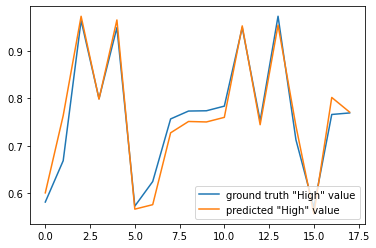

In [73]:
plt.plot(a,label='ground truth "High" value')
plt.plot(y_test, label='predicted "High" value')
plt.legend()